In [96]:
import pandas as pd
import numpy as np
import requests
import csv
import json
import xml
import folium 
import geocoder
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim 
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
CLIENT_ID = 'LJ04XXGT1F2NO2R2VGSEQQF3ENDJRT5LWGATO3TZDS3LSYZ0'
CLIENT_SECRET = 'HG0OAL400E3YDUAMB3O5YBB4IN4YOHUYU211M2GVWXBXLUOM'
VERSION = '20180604'
LIMIT = 950
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LJ04XXGT1F2NO2R2VGSEQQF3ENDJRT5LWGATO3TZDS3LSYZ0
CLIENT_SECRET:HG0OAL400E3YDUAMB3O5YBB4IN4YOHUYU211M2GVWXBXLUOM


In [98]:
df_bhopal=pd.read_csv('Book1.csv')
df_bhopal

,Location,Pincode,Latitude,Longitude
0,Air Port,462030,23.291640,77.336880
1,Amarawat Kalan,462042,23.264710,77.405190
2,Anand Nagar,462021,23.254060,77.487950
3,Arera Hills,462011,23.238210,77.423530
4,Arwaliya,462038,23.345480,77.392550
5,Ayodhaya Nagar,462041,23.282460,77.467590
6,Bag Mungalia,462043,23.226070,77.305490
7,Bagroda,462026,23.847370,78.233990
8,Bairagarh,462030,23.270960,77.337140
9,Bairagarh Chichali,462042,23.141300,77.409100


In [99]:
bhopal_filtered=df_bhopal[['Location','Pincode']]

In [104]:
bhopal_filtered

,Location,Pincode
0,Air Port,462030
1,Amarawat Kalan,462042
2,Anand Nagar,462021
3,Arera Hills,462011
4,Arwaliya,462038
5,Ayodhaya Nagar,462041
6,Bag Mungalia,462043
7,Bagroda,462026
8,Bairagarh,462030
9,Bairagarh Chichali,462042


In [105]:
def get_latlng(location):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Bhopal, Madhya Pradesh'.format(location))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [106]:
coords = [ get_latlng(location) for location in bhopal_filtered["Location"].tolist() ]

In [107]:
coords

[[23.29164000000003, 77.33688000000006],
 [23.264710000000036, 77.40519000000006],
 [23.254060000000038, 77.48795000000007],
 [23.238210000000038, 77.42353000000008],
 [23.345480000000066, 77.39255000000009],
 [23.28246000000007, 77.46759000000003],
 [23.22607000000005, 77.30549000000008],
 [23.84737000000007, 78.23399000000006],
 [23.27096000000006, 77.33714000000003],
 [23.141300000000058, 77.40910000000008],
 [23.28177000000005, 77.32806000000005],
 [23.264710000000036, 77.40519000000006],
 [23.410330000000044, 77.54683000000006],
 [23.137620000000027, 77.53571000000005],
 [23.53618000000006, 77.45470000000006],
 [23.228450574281634, 77.47784420801568],
 [23.200230000000033, 77.33533000000006],
 [23.775580000000048, 77.41809000000006],
 [23.185140000000047, 77.51109000000008],
 [23.70667000000003, 77.59949000000006],
 [23.18473000000006, 77.43735000000004],
 [23.263750000000073, 77.41314000000006],
 [23.297480000000064, 77.40870000000007],
 [23.295755483432036, 77.40377716556215],
 

In [108]:
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [109]:
bhopal_filtered['Latitude'] = df_coords['Latitude']
bhopal_filtered['Longitude'] = df_coords['Longitude']

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [110]:
print(bhopal_filtered.shape)
bhopal_filtered

(131, 4)


,Location,Pincode,Latitude,Longitude
0,Air Port,462030,23.291640,77.336880
1,Amarawat Kalan,462042,23.264710,77.405190
2,Anand Nagar,462021,23.254060,77.487950
3,Arera Hills,462011,23.238210,77.423530
4,Arwaliya,462038,23.345480,77.392550
5,Ayodhaya Nagar,462041,23.282460,77.467590
6,Bag Mungalia,462043,23.226070,77.305490
7,Bagroda,462026,23.847370,78.233990
8,Bairagarh,462030,23.270960,77.337140
9,Bairagarh Chichali,462042,23.141300,77.409100


In [111]:
bhopal_filtered.to_csv("Book1.csv", index=False)

In [113]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, bhopal_filtered.loc[0]['Latitude'], bhopal_filtered.loc[0]['Longitude'], VERSION, search_query1, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=LJ04XXGT1F2NO2R2VGSEQQF3ENDJRT5LWGATO3TZDS3LSYZ0&client_secret=HG0OAL400E3YDUAMB3O5YBB4IN4YOHUYU211M2GVWXBXLUOM&ll=23.29164000000003,77.33688000000006&v=20180604&query=Medical Center&radius=5000&limit=950'

In [114]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d4134222b274a002c7be18c'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d196941735',
      'name': 'Hospital',
      'pluralName': 'Hospitals',
      'primary': True,
      'shortName': 'Hospital'}],
    'hasPerk': False,
    'id': '5a2e2ca95d891b7604dfe670',
    'location': {'cc': 'IN',
     'city': 'Bhopal',
     'country': 'India',
     'distance': 3883,
     'formattedAddress': ['Bhopal 462030', 'Madhya Pradesh', 'India'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 23.268888,
       'lng': 77.30809}],
     'lat': 23.268888,
     'lng': 77.30809,
     'postalCode': '462030',
     'state': 'Madhya Pradesh'},
    'name': 'Chirayu Hospital And Medical College',
    'referralId': 'v-1564554274'},
   {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/militarybase_',
       '

In [115]:
len(results['response']['venues'])

5

In [116]:
def get_venues(index,bhopal_filtered):
    search_query1 = 'Medical Center'
    search_query2 = 'Food'
    search_query3 = 'Travel & Transport'
    radius = 500
    url1 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, bhopal_filtered.loc[0]['Latitude'], bhopal_filtered.loc[0]['Longitude'], VERSION, search_query1, radius, LIMIT)
    url2 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, bhopal_filtered.loc[0]['Latitude'], bhopal_filtered.loc[0]['Longitude'], VERSION, search_query2, radius, LIMIT)
    url3 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, bhopal_filtered.loc[0]['Latitude'], bhopal_filtered.loc[0]['Longitude'], VERSION, search_query3, radius, LIMIT)
    results = requests.get(url1).json()
    m=len(results['response']['venues'])
    results = requests.get(url2).json()
    c=len(results['response']['venues'])
    results = requests.get(url3).json()
    f=len(results['response']['venues'])
    #print(m,c,f,s,t)
    return [bhopal_filtered.loc[0]['Location'],m,c,f]

In [117]:
stats=pd.DataFrame(columns=['Location','medical','food','transport'])
stats

,Location,medical,food,transport


In [120]:
for i in range(10,len(bhopal_filtered)):
    stats.loc[len(stats), :] = get_venues(i,bhopal_filtered)

In [122]:
stats.to_csv("bhopal_traversed.csv", index=False)

In [128]:
extracted=pd.read_csv('bhopal_traversed.csv')

In [129]:
extracted

,Location,medical,food,transport
0,Air Port,2,12,3
1,Amarawat Kalan,0,23,2
2,Anand Nagar,1,34,8
3,Arera Hills,2,11,6
4,Arwaliya,1,34,5
5,Ayodhaya Nagar,4,22,4
6,Bag Mungalia,5,45,2
7,Bagroda,6,56,1
8,Bairagarh,0,44,5
9,Bairagarh Chichali,0,23,7


In [132]:
final_df=bhopal_filtered.join(extracted,lsuffix='_previous', rsuffix='_next')
final_df

,Location_previous,Pincode,Latitude,Longitude,Location_next,medical,food,transport
0,Air Port,462030,23.291640,77.336880,Air Port,2,12,3
1,Amarawat Kalan,462042,23.264710,77.405190,Amarawat Kalan,0,23,2
2,Anand Nagar,462021,23.254060,77.487950,Anand Nagar,1,34,8
3,Arera Hills,462011,23.238210,77.423530,Arera Hills,2,11,6
4,Arwaliya,462038,23.345480,77.392550,Arwaliya,1,34,5
5,Ayodhaya Nagar,462041,23.282460,77.467590,Ayodhaya Nagar,4,22,4
6,Bag Mungalia,462043,23.226070,77.305490,Bag Mungalia,5,45,2
7,Bagroda,462026,23.847370,78.233990,Bagroda,6,56,1
8,Bairagarh,462030,23.270960,77.337140,Bairagarh,0,44,5
9,Bairagarh Chichali,462042,23.141300,77.409100,Bairagarh Chichali,0,23,7


In [134]:
del final_df['Location_next']

In [135]:
final_df

,Location_previous,Pincode,Latitude,Longitude,medical,food,transport
0,Air Port,462030,23.291640,77.336880,2,12,3
1,Amarawat Kalan,462042,23.264710,77.405190,0,23,2
2,Anand Nagar,462021,23.254060,77.487950,1,34,8
3,Arera Hills,462011,23.238210,77.423530,2,11,6
4,Arwaliya,462038,23.345480,77.392550,1,34,5
5,Ayodhaya Nagar,462041,23.282460,77.467590,4,22,4
6,Bag Mungalia,462043,23.226070,77.305490,5,45,2
7,Bagroda,462026,23.847370,78.233990,6,56,1
8,Bairagarh,462030,23.270960,77.337140,0,44,5
9,Bairagarh Chichali,462042,23.141300,77.409100,0,23,7


In [136]:
final_df.columns=['Location','Pincode','Latitude','Longitude','medical','food','transport']

In [137]:
final_df

,Location,Pincode,Latitude,Longitude,medical,food,transport
0,Air Port,462030,23.291640,77.336880,2,12,3
1,Amarawat Kalan,462042,23.264710,77.405190,0,23,2
2,Anand Nagar,462021,23.254060,77.487950,1,34,8
3,Arera Hills,462011,23.238210,77.423530,2,11,6
4,Arwaliya,462038,23.345480,77.392550,1,34,5
5,Ayodhaya Nagar,462041,23.282460,77.467590,4,22,4
6,Bag Mungalia,462043,23.226070,77.305490,5,45,2
7,Bagroda,462026,23.847370,78.233990,6,56,1
8,Bairagarh,462030,23.270960,77.337140,0,44,5
9,Bairagarh Chichali,462042,23.141300,77.409100,0,23,7


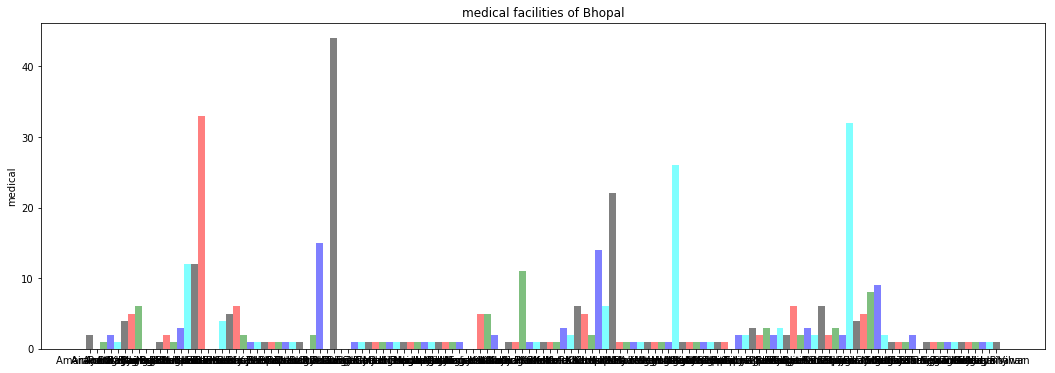

In [167]:
fig, ax = plt.subplots(figsize=(18,6))
y_pos = np.arange(len(final_df))
plt.bar(y_pos, final_df[:]['medical'], align='center', alpha=0.5, color=['black', 'red', 'green', 'blue', 'cyan'], width = 1.0)
plt.xticks(y_pos, final_df[:]['Location'])
plt.ylabel('medical')
plt.title('medical facilities of Bhopal')
plt.show()

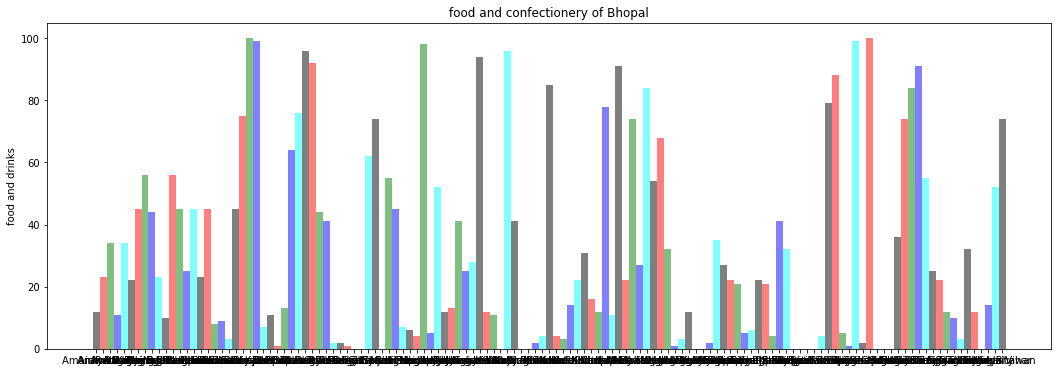

In [168]:
fig, ax = plt.subplots(figsize=(18,6))
y_pos = np.arange(len(final_df))
plt.bar(y_pos, final_df[:]['food'], align='center', alpha=0.5, color=['black', 'red', 'green', 'blue', 'cyan'], width = 1.0)
plt.xticks(y_pos, final_df[:]['Location'])
plt.ylabel('food and drinks')
plt.title('food and confectionery of Bhopal')
plt.show()

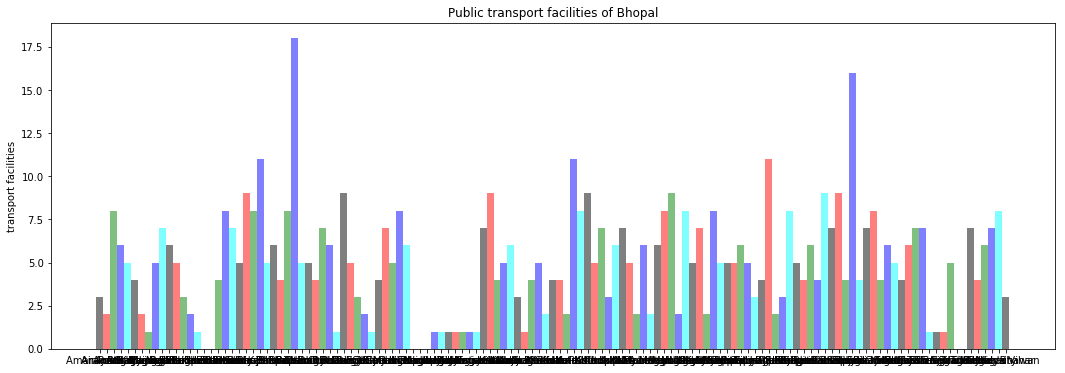

In [166]:
fig, ax = plt.subplots(figsize=(18,6))
y_pos = np.arange(len(final_df))
plt.bar(y_pos, final_df[:]['transport'], align='center', alpha=0.5, color=['black', 'red', 'green', 'blue', 'cyan'], width = 1.0)
plt.xticks(y_pos, final_df[:]['Location'])
plt.ylabel('transport facilities')
plt.title('Public transport facilities of Bhopal')
plt.show()

In [169]:
#plot on Bhopal Map
bhopal_map = folium.Map(location=[22.3511148, 78.6677428], zoom_start=6)

for Latitude, Longitude, label in zip(final_df.Latitude, final_df.Longitude, final_df.Location):
    folium.CircleMarker(
        [Latitude, Longitude],
        radius=1,
        popup=label,
        fill=True,
        color='blue',
        fill_color='red',
        fill_opacity=0.8
        ).add_to(bhopal_map)
bhopal_map

In [170]:
final_df.dtypes

Location      object
Pincode        int64
Latitude     float64
Longitude    float64
medical        int64
food           int64
transport      int64
dtype: object

In [171]:
final_df['medical'] = final_df.medical.astype(float)
final_df['food'] = final_df.food.astype(float)
final_df['transport'] = final_df.transport.astype(float)
final_df.dtypes

Location      object
Pincode        int64
Latitude     float64
Longitude    float64
medical      float64
food         float64
transport    float64
dtype: object

In [172]:
features = np.array(final_df.drop(['Location','Latitude','Longitude','Pincode'], 1).astype(float))
features

array([[  2.,  12.,   3.],
       [  0.,  23.,   2.],
       [  1.,  34.,   8.],
       [  2.,  11.,   6.],
       [  1.,  34.,   5.],
       [  4.,  22.,   4.],
       [  5.,  45.,   2.],
       [  6.,  56.,   1.],
       [  0.,  44.,   5.],
       [  0.,  23.,   7.],
       [  1.,  10.,   6.],
       [  2.,  56.,   5.],
       [  1.,  45.,   3.],
       [  3.,  25.,   2.],
       [ 12.,  45.,   1.],
       [ 12.,  23.,   0.],
       [ 33.,  45.,   0.],
       [  0.,   8.,   4.],
       [  0.,   9.,   8.],
       [  4.,   3.,   7.],
       [  5.,  45.,   5.],
       [  6.,  75.,   9.],
       [  2., 100.,   8.],
       [  1.,  99.,  11.],
       [  1.,   7.,   5.],
       [  1.,  11.,   6.],
       [  1.,   1.,   4.],
       [  1.,  13.,   8.],
       [  1.,  64.,  18.],
       [  1.,  76.,   5.],
       [  1.,  96.,   5.],
       [  0.,  92.,   4.],
       [  2.,  44.,   7.],
       [ 15.,  41.,   6.],
       [  0.,   2.,   1.],
       [ 44.,   2.,   9.],
       [  0.,   1.,   5.],
 

In [173]:
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)
k_means.fit(features)
k_means_labels = k_means.labels_
k_means_labels
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 3.18333333,  5.1       ,  4.78333333],
       [ 4.29166667, 86.20833333,  5.66666667],
       [ 4.38095238, 48.95238095,  4.28571429],
       [ 2.03846154, 26.23076923,  4.96153846]])

In [174]:
k_means_labels

array([0, 3, 3, 0, 3, 3, 2, 2, 2, 3, 0, 2, 2, 3, 2, 3, 2, 0, 0, 0, 2, 1,
       1, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2,
       0, 0, 0, 1, 0, 2, 0, 0, 2, 3, 3, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1,
       0, 0, 0, 3, 3, 3, 0, 1, 0, 1, 3, 1, 3, 1, 2, 1, 3, 0, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 2, 3, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 3, 1, 1, 1, 2, 3, 3, 0, 0, 0, 3, 0, 0, 0, 2, 1])

In [175]:
final_df['Category']=k_means_labels

In [176]:
final_df

,Location,Pincode,Latitude,Longitude,medical,food,transport,Category
0,Air Port,462030,23.291640,77.336880,2.0,12.0,3.0,0
1,Amarawat Kalan,462042,23.264710,77.405190,0.0,23.0,2.0,3
2,Anand Nagar,462021,23.254060,77.487950,1.0,34.0,8.0,3
3,Arera Hills,462011,23.238210,77.423530,2.0,11.0,6.0,0
4,Arwaliya,462038,23.345480,77.392550,1.0,34.0,5.0,3
5,Ayodhaya Nagar,462041,23.282460,77.467590,4.0,22.0,4.0,3
6,Bag Mungalia,462043,23.226070,77.305490,5.0,45.0,2.0,2
7,Bagroda,462026,23.847370,78.233990,6.0,56.0,1.0,2
8,Bairagarh,462030,23.270960,77.337140,0.0,44.0,5.0,2
9,Bairagarh Chichali,462042,23.141300,77.409100,0.0,23.0,7.0,3


In [177]:
#plot areas according to price of land
bhopal_map = folium.Map(location=[23.536180, 77.405190], zoom_start=4)
cat0 = folium.FeatureGroup(name='<span  style="height: 15px; width: 15px; background-color: red  ; border-radius: 50%; display: inline-block;"></span>Category 1')
cat1 = folium.FeatureGroup(name='<span  style="height: 15px; width: 15px; background-color: green   ; border-radius: 50%; display: inline-block;"></span>Category 2')
cat2 = folium.FeatureGroup(name='<span  style="height: 15px; width: 15px; background-color: blue ; border-radius: 50%; display: inline-block;"></span>Category 3')
cat3 = folium.FeatureGroup(name='<span  style="height: 15px; width: 15px; background-color: cyan; border-radius: 50%; display: inline-block;"></span>Category 4')
for Latitude, Longitude, label, tier in zip(final_df.Latitude, final_df.Longitude, final_df.Location, final_df.Category):
    if tier==0:
        folium.CircleMarker(
            [Latitude, Longitude],
            radius=2,
            popup=label,
            fill=True,
            color='red',
            fill_color='red',
            fill_opacity=0.6
            ).add_to(cat0)
    elif tier==1:
        folium.CircleMarker(
                [Latitude, Longitude],
                radius=2,
                popup=label,
                fill=True,
                color='green',
                fill_color='green',
                fill_opacity=0.6
                ).add_to(cat1)
    elif tier==2:
        folium.CircleMarker(
            [Latitude, Longitude],
            radius=2,
            popup=label,
            fill=True,
            color='blue',
            fill_color='blue',
            fill_opacity=0.6
            ).add_to(cat2)
    elif tier==3:
        folium.CircleMarker(
            [Latitude, Longitude],
            radius=2,
            popup=label,
            fill=True,
            color='cyan',
            fill_color='cyan',
            fill_opacity=0.6
            ).add_to(cat3)
        
cat0.add_to(bhopal_map)
cat1.add_to(bhopal_map)
cat2.add_to(bhopal_map)
cat3.add_to(bhopal_map)
folium.map.LayerControl('topright', collapsed=False).add_to(bhopal_map)

bhopal_map